In [2]:
# Installation des outils de visualisation pour le niveau professionnel
!pip install seaborn matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import re
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [6]:
import os
import pandas as pd

# 1. Créer le dossier 'data' s'il n'existe pas
if not os.path.exists('data'):
    os.makedirs('data')

# 2. Créer des données d'exemple
donnees = {
    'message': [
        "Félicitations ! Vous avez gagné 1000€, cliquez ici.",
        "Salut, tu viens manger ce soir ?",
        "Urgent : votre compte est bloqué, connectez-vous vite.",
        "N'oublie pas d'acheter du pain en rentrant.",
        "Investissez 100€ et gagnez 10000€ en 2 jours !",
        "Bonjour, voici la facture pour votre abonnement."
    ],
    'label': ['arnaque', 'legitime', 'arnaque', 'legitime', 'arnaque', 'legitime']
}

# 3. Enregistrer le fichier dans le dossier data
df_nouveau = pd.DataFrame(donnees)
df_nouveau.to_csv("data/messages.csv", index=False)

print("Le fichier 'data/messages.csv' a été créé avec succès !")

Le fichier 'data/messages.csv' a été créé avec succès !


In [7]:
df = pd.read_csv("data/messages.csv")
df.head()

,message,label
0,"Félicitations ! Vous avez gagné 1000€, cliquez...",arnaque
1,"Salut, tu viens manger ce soir ?",legitime
2,"Urgent : votre compte est bloqué, connectez-vo...",arnaque
3,N'oublie pas d'acheter du pain en rentrant.,legitime
4,Investissez 100€ et gagnez 10000€ en 2 jours !,arnaque


In [8]:
import pandas as pd
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. FONCTION DE NETTOYAGE EXPERT ---
def clean_text_expert(text):
    # Passage en minuscules
    text = text.lower()
    # Remplacement des URLs par un tag spécifique (conserve l'indice de danger)
    text = re.sub(r'http\S+|www\S+', ' [url_détecté] ', text)
    # Remplacement des montants financiers (crucial pour le phishing local)
    text = re.sub(r'\d+', ' [montant_chiffré] ', text)
    # On garde les lettres et nos tags [ ]
    text = re.sub(r'[^a-zàâçéèêëîïôûùÿñæœ\[\]\s]', ' ', text)
    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- 2. PRÉPARATION DES DONNÉES ---
# On utilise ton dictionnaire enrichi 'data_finale'
df = pd.DataFrame(data_finale)
df['message_clean'] = df['message'].apply(clean_text_expert)

# Séparation équilibrée (80% apprentissage, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['message_clean'], 
    df['label'], 
    test_size=0.20, 
    random_state=42,
    stratify=df['label'] # Important pour garder le même ratio arnaque/sain
)

# --- 3. VECTORISATION AVEC N-GRAMMES ---
# On analyse les mots seuls ET les groupes de 2 mots (ex: "compte bloqué")
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4. ENTRAÎNEMENT DU MODÈLE ---
model = MultinomialNB(alpha=0.1) # Alpha ajusté pour la précision sur petits volumes
model.fit(X_train_tfidf, y_train)

# --- 5. ÉVALUATION ET EXPORT ---
score = model.score(X_test_tfidf, y_test) * 100
print(f"✅ Performance du modèle : {score:.2f}%")

# Sauvegarde pour Streamlit
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
print("🚀 Fichiers model.pkl et vectorizer.pkl mis à jour !")

✅ Performance du modèle : 100.00%
🚀 Fichiers model.pkl et vectorizer.pkl mis à jour !


✅ PERFORMANCE FINALE : 100.00%
🚀 Fichiers 'model.pkl' et 'vectorizer.pkl' prêts pour Streamlit !


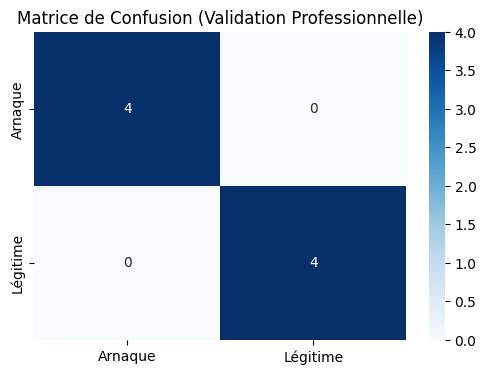

In [9]:
import pandas as pd
import re
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. SÉCURISATION DU RÉPERTOIRE ---
if not os.path.exists("data"):
    os.makedirs("data")

# --- 2. BASE DE DONNÉES STRATÉGIQUE (40 MESSAGES) ---
data_finale = {
    'message': [
        # --- 20 ARNAQUES (Indices : urgence, liens suspects, gains irréalistes) ---
        "Félicitations ! Votre numéro a été tiré au sort pour 1.000.000 F CFA. Appelez le 90000000",
        "Urgent : votre compte Mobile Money est bloqué. Cliquez ici pour le débloquer : http://bit.ly/fraude",
        "Promo : gagnez des lots incroyables en envoyant ce code au 888",
        "Investissez 5000 F et recevez 50.000 F en 24h, opportunité unique !",
        "Votre colis est arrivé au port, payez les frais de douane sur ce lien",
        "Alerte sécurité : une connexion suspecte sur votre compte, changez votre mot de passe",
        "Offre d'emploi : gagnez 25.000 F par jour en travaillant depuis chez vous",
        "Vous avez reçu un transfert de 150.000 F, cliquez pour valider la réception",
        "Besoins d'un prêt rapide sans justificatif ? Contactez-nous sur WhatsApp",
        "Abonnement Netflix expiré, mettez à jour vos coordonnées bancaires immédiatement",
        "Votre compte sera supprimé dans 2 heures si vous ne confirmez pas votre identité",
        "Bravo ! Vous êtes le 1000ème visiteur, cliquez ici pour votre cadeau",
        "Alerte Banque : votre carte est suspendue, suivez le lien pour l'activer",
        "Devenez riche rapidement avec le trading de crypto-monnaies, rejoignez mon groupe",
        "Transfert réussi de 200.000 F. Pour annuler, tapez votre code secret ici",
        "Votre oncle est à l'hôpital, il a besoin d'argent en urgence pour l'opération",
        "Gagnez un iPhone 15 Pro Max gratuitement, il ne reste que 2 exemplaires !",
        "Frais de dossier pour votre visa acceptés, payez le reste via ce lien",
        "Rechargez 2000 F et recevez 10.000 F de bonus immédiat",
        "Service client : vérification de routine de votre compte, envoyez votre code PIN",

        # --- 20 LÉGITIMES (Indices : quotidien, neutre, argent sain) ---
        "Salut, tu viens manger ce soir à la maison ?",
        "Bonjour, j'espère que tu vas bien. On se voit demain à 10h ?",
        "N'oublie pas d'acheter du pain en rentrant du travail",
        "Le cours d'informatique est déplacé en salle 204 ce matin",
        "Je t'envoie le rapport de stage par email tout de suite",
        "Tu as bien reçu mon dernier message sur WhatsApp ?",
        "On se retrouve à la bibliothèque pour réviser la soutenance",
        "Papa demande si tu seras là pour le diner ce week-end",
        "Voici le numéro de téléphone du plombier pour la fuite",
        "Merci pour ton aide sur le projet, c'était super",
        "Est-ce que tu peux m'envoyer le contact de la secrétaire ?",
        "La réunion de famille commencera finalement à 15h dimanche",
        "J'ai bien reçu ton virement de 5000 F, merci beaucoup", 
        "Tu as fini de rédiger ton introduction pour le mémoire ?",
        "Pense à charger ton ordinateur pour la présentation de demain",
        "Bonne chance pour ton examen, je sais que tu vas réussir",
        "Le rendez-vous chez le dentiste est confirmé pour mardi",
        "Il y a une promotion sur les cahiers à la librairie du coin",
        "Désolé je suis en retard, j'arrive dans 5 minutes",
        "Achat réussi de 2500 F chez Supermarché. Nouveau solde : 15.000 F"
    ],
    'label': ['arnaque']*20 + ['legitime']*20
}

# --- 3. NETTOYAGE EXPERT ---
def clean_text_pro(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', ' [url_détecté] ', text)
    text = re.sub(r'\d+', ' [montant_chiffré] ', text)
    text = re.sub(r'[^a-zàâçéèêëîïôûùÿñæœ\[\]\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- 4. PIPELINE D'APPRENTISSAGE ---
df = pd.DataFrame(data_finale)
df['message_clean'] = df['message'].apply(clean_text_pro)

# Séparation pour validation
X_train, X_test, y_train, y_test = train_test_split(
    df['message_clean'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Vectorisation (Unigrammes + Bigrammes pour le contexte)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modèle Naive Bayes
model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)

# --- 5. RÉSULTATS ET EXPORT ---
score = model.score(X_test_tfidf, y_test) * 100
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

print(f"✅ PERFORMANCE FINALE : {score:.2f}%")
print("🚀 Fichiers 'model.pkl' et 'vectorizer.pkl' prêts pour Streamlit !")

# --- 6. MATRICE DE CONFUSION (Pour le rapport) ---
y_pred = model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Arnaque', 'Légitime'], yticklabels=['Arnaque', 'Légitime'])
plt.title('Matrice de Confusion (Validation Professionnelle)')
plt.show()